In [2]:
# ====== BLOQUE A: Carga LOCAL (Adaptado para VS Code) ======
import pandas as pd
import os

# 1. Definimos las rutas relativas
# "../data/" significa: sal de la carpeta notebooks (..) y entra a data
path_investigadores = "../data/Investigadores_Reconocidos_por_convocatoria_2021.xlsx"
path_grupos = "../data/Grupos_de_Investigaci_n_Reconocidos_2021.xlsx"

# 2. Cargamos directamente (sin pedir subida manual)
try:
    inv = pd.read_excel(path_investigadores)
    grp = pd.read_excel(path_grupos)
    print(f"✅ Archivos cargados exitosamente.")
    print(f"Investigadores: {inv.shape}")
    print(f"Grupos: {grp.shape}")

except FileNotFoundError as e:
    print("❌ ERROR: No encuentro el archivo. Revisa el nombre en la carpeta data/")
    print(f"Detalle: {e}")

✅ Archivos cargados exitosamente.
Investigadores: (77237, 30)
Grupos: (30051, 21)


In [3]:
# ==== BLOQUE B: Conteos por año (sin graficar) ====

import pandas as pd

# Si no existen, vuelve a leer desde los nombres detectados en el bloque A
try:
    inv, grp
except NameError:
    inv = pd.read_excel('Investigadores_Reconocidos_por_convocatoria_2021.xlsx')
    grp = pd.read_excel('Grupos_de_Investigaci_n_Reconocidos_2021.xlsx')

def counts_by_year(df, name):
    if 'ANO_CONVO' not in df.columns:
        raise ValueError(f"[{name}] no tiene columna ANO_CONVO")

    # Extraer año desde datetime64[ns] (ya vimos que ambos vienen así)
    year = pd.to_datetime(df['ANO_CONVO'], errors='coerce').dt.year

    # Resumen
    vc = (year
          .dropna()
          .astype(int)
          .value_counts()
          .sort_index())
    total = int(vc.sum())

    print(f"\n[{name}] años únicos: {sorted(year.dropna().astype(int).unique().tolist())}")
    print(f"[{name}] total registros contados por año: {total}")
    print(f"[{name}] shape original: {df.shape[0]}")
    display(vc.rename('conteo').to_frame())

    # Devolver serie por si la usamos luego
    return vc

inv_year_counts = counts_by_year(inv, "INVESTIGADORES")
grp_year_counts = counts_by_year(grp, "GRUPOS")

# Chequeo cruzado rápido (no deben ser idénticos)
same = inv_year_counts.equals(grp_year_counts.reindex(inv_year_counts.index).fillna(0).astype(int))
print("\n¿Series idénticas investigador vs grupo? ->", same)



[INVESTIGADORES] años únicos: [2013, 2014, 2015, 2017, 2019, 2021]
[INVESTIGADORES] total registros contados por año: 77237
[INVESTIGADORES] shape original: 77237


,conteo
ANO_CONVO,
2013,8016
2014,8280
2015,10050
2017,13001
2019,16796
2021,21094



[GRUPOS] años únicos: [2013, 2014, 2015, 2017, 2019, 2021]
[GRUPOS] total registros contados por año: 30051
[GRUPOS] shape original: 30051


,conteo
ANO_CONVO,
2013,4304
2014,3970
2015,4638
2017,5207
2019,5772
2021,6160



¿Series idénticas investigador vs grupo? -> False


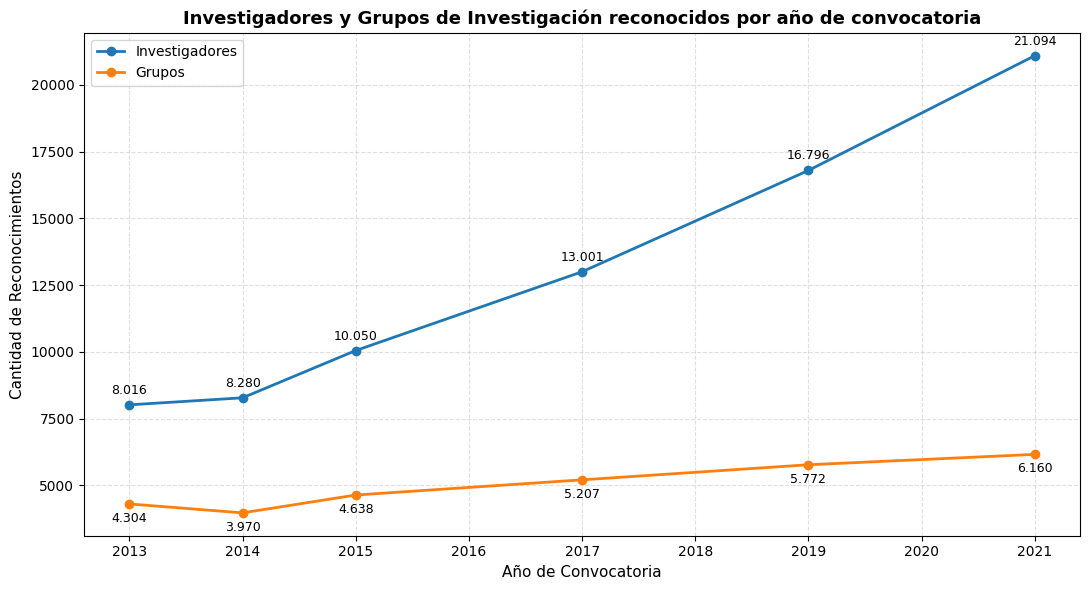

In [4]:
# ==== BLOQUE C: Gráfico final de investigadores vs grupos ====
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Fusionar series en un solo DataFrame para graficar
df_year = pd.concat([inv_year_counts.rename('Investigadores'),
                     grp_year_counts.rename('Grupos')], axis=1).fillna(0).astype(int)

# Crear figura
plt.figure(figsize=(11, 6))

# Línea de Investigadores
plt.plot(df_year.index, df_year['Investigadores'],
         marker='o', linewidth=2, color='#1f77b4', label='Investigadores')

# Línea de Grupos
plt.plot(df_year.index, df_year['Grupos'],
         marker='o', linewidth=2, color='#ff7f0e', label='Grupos')

# Etiquetas numéricas
for x, y in zip(df_year.index, df_year['Investigadores']):
    plt.text(x, y + 300, f"{y:,}".replace(",", "."), ha='center', va='bottom', fontsize=9)
for x, y in zip(df_year.index, df_year['Grupos']):
    plt.text(x, y - 300, f"{y:,}".replace(",", "."), ha='center', va='top', fontsize=9)

# Personalización del gráfico
plt.title("Investigadores y Grupos de Investigación reconocidos por año de convocatoria", fontsize=13, weight='bold')
plt.xlabel("Año de Convocatoria", fontsize=11)
plt.ylabel("Cantidad de Reconocimientos", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=10)
plt.xticks(df_year.index)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


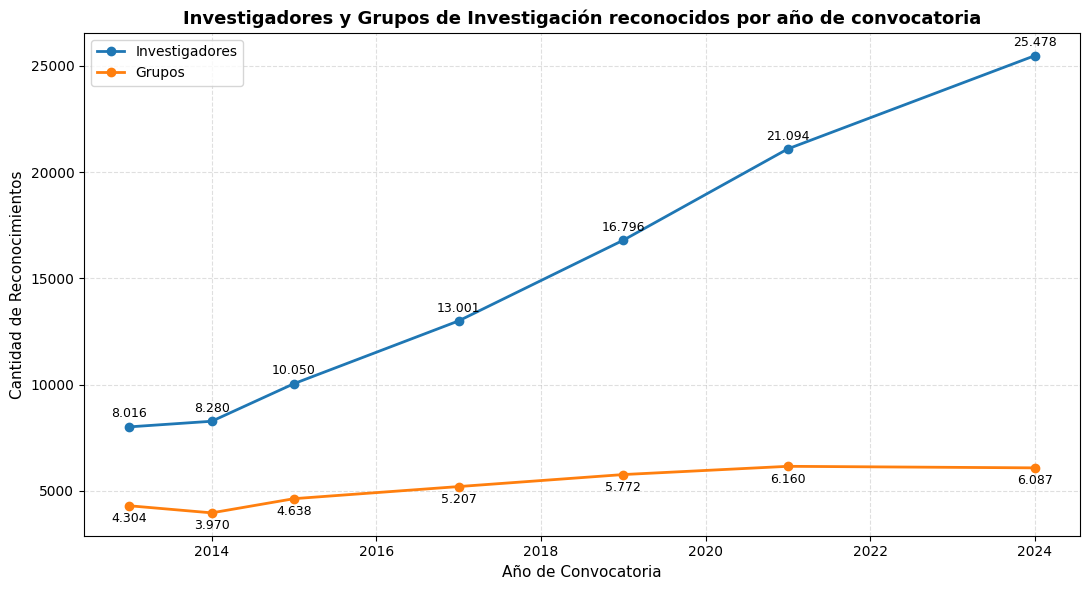

In [5]:
# ==== BLOQUE D: Añadir manualmente datos 2024 ====
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

# Partimos del DataFrame anterior (df_year)
df_year_extended = df_year.copy()

# Añadir el año 2024 manualmente
df_year_extended.loc[2024] = {'Investigadores': 25478, 'Grupos': 6087}

# Reordenar por año (por si acaso)
df_year_extended = df_year_extended.sort_index()

# Crear figura
plt.figure(figsize=(11, 6))

# Línea de Investigadores
plt.plot(df_year_extended.index, df_year_extended['Investigadores'],
         marker='o', linewidth=2, color='#1f77b4', label='Investigadores')

# Línea de Grupos
plt.plot(df_year_extended.index, df_year_extended['Grupos'],
         marker='o', linewidth=2, color='#ff7f0e', label='Grupos')

# Etiquetas numéricas
for x, y in zip(df_year_extended.index, df_year_extended['Investigadores']):
    plt.text(x, y + 300, f"{y:,}".replace(",", "."), ha='center', va='bottom', fontsize=9)
for x, y in zip(df_year_extended.index, df_year_extended['Grupos']):
    plt.text(x, y - 300, f"{y:,}".replace(",", "."), ha='center', va='top', fontsize=9)

# Personalización del gráfico
plt.title("Investigadores y Grupos de Investigación reconocidos por año de convocatoria", fontsize=13, weight='bold')
plt.xlabel("Año de Convocatoria", fontsize=11)
plt.ylabel("Cantidad de Reconocimientos", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=10)
plt.xticks(df_year_extended.index)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


In [6]:
# --- 1. Vistazo general (Primeras filas) ---
print("🔍 VISTA PREVIA DE INVESTIGADORES:")
display(inv.head(3))

print("\n🔍 VISTA PREVIA DE GRUPOS:")
display(grp.head(3))

# --- 2. Radiografía Técnica (Tipos de datos y nulos) ---
print("\n📋 INFO TÉCNICA (INVESTIGADORES):")
inv.info()

# --- 3. Búsqueda de Duplicados ---
duplicados_inv = inv.duplicated().sum()
duplicados_grp = grp.duplicated().sum()

print(f"\n⚠️ Filas totalmente duplicadas en Investigadores: {duplicados_inv}")
print(f"⚠️ Filas totalmente duplicadas en Grupos: {duplicados_grp}")

🔍 VISTA PREVIA DE INVESTIGADORES:


,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,ID_PERSONA_PR,ID_AREA_CON_PR,NME_ESP_AREA_PR,NME_AREA_PR,NME_GRAN_AREA_PR,NME_GENERO_PR,NME_PAIS_NAC_PR,...,EDAD_ANOS_PR,NME_PAIS_RES_PR,NME_REGION_RES_PR,NME_DEPARTAMENTO_RES_PR,NME_MUNICIPIO_RES_PR,COD_DANE_RES_PR,ID_VICTIMA_CONFLICTO,TXT_GRUPO_ETNICO,TXT_POBLACION_DISCA,INST_FILIA
0,16,Convocatoria 640 de 2013,2013-10-31,3781,00,No registra,No registra,No registra,Masculino,Colombia,...,6692.0,Exterior,Exterior,Exterior,Exterior,NaN,No registra,No disponible,No disponible,NaN
1,16,Convocatoria 640 de 2013,2013-10-31,1336603,00,No registra,No registra,No registra,Femenino,Exterior,...,3642.0,Exterior,Exterior,Exterior,Exterior,NaN,No registra,No disponible,No disponible,NaN
2,16,Convocatoria 640 de 2013,2013-10-31,1354159,00,No registra,No registra,No registra,Femenino,Colombia,...,6988.0,Colombia,Pacífico,Chocó,Quibdó,27001.0,No registra,No disponible,No disponible,NaN



🔍 VISTA PREVIA DE GRUPOS:


,ID_CONVOCATORIA,NME_CONVOCATORIA,ANO_CONVO,COD_GRUPO_GR,NME_GRUPO_GR,FCREACION_GR,NME_MUNICIPIO_GR,NME_DEPARTAMENTO_GR,NME_REGION_GR,NME_PAIS_GR,...,ID_AREA_CON_GR,NME_AREA_ESP_GR,NME_AREA_GR,NME_GRAN_AREA_GR,NME_CLASIFICACION_GR,ORDEN_CLAS_GR,EDAD_ANOS_GR,INST_AVAL,NME_PROG_COLC1_GR,NME_PROG_COLC2_GR
0,16,Convocatoria 640 de 2013,2013-10-31,COL0016283,Socialización y violencia,1993-02-01,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5I,No registra,Otras Ciencias Sociales,Ciencias Sociales,C,2,21,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"
1,16,Convocatoria 640 de 2013,2013-10-31,COL0018751,ECITRONICA,2002-01-01,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,2B,No registra,"Ingenierías Eléctrica, Electrónica e Informática",Ingeniería y Tecnología,C,2,1208,ESCUELA COLOMBIANA DE INGENIERIA JULIO GARAVITO,"Ciencia, Tecnología e Innovación en Tecnología...",Desarrollo Tecnológico e Innovación Industrial
2,16,Convocatoria 640 de 2013,2013-10-31,COL0013334,Línea de Investigación en Jóvenes y Culturas J...,1995-06-01,"Bogotá, D.C.","Bogotá, D. C.",Distrito Capital,Colombia,...,5D,No registra,Sociología,Ciencias Sociales,D,1,1867,UNIVERSIDAD CENTRAL,"Ciencia, Tecnología e Innovación en Ciencias H...","Ciencia, Tecnología e Innovación en Educación"



📋 INFO TÉCNICA (INVESTIGADORES):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77237 entries, 0 to 77236
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_CONVOCATORIA          77237 non-null  int64         
 1   NME_CONVOCATORIA         77237 non-null  object        
 2   ANO_CONVO                77237 non-null  datetime64[ns]
 3   ID_PERSONA_PR            77237 non-null  int64         
 4   ID_AREA_CON_PR           77237 non-null  object        
 5   NME_ESP_AREA_PR          77237 non-null  object        
 6   NME_AREA_PR              77237 non-null  object        
 7   NME_GRAN_AREA_PR         77237 non-null  object        
 8   NME_GENERO_PR            77237 non-null  object        
 9   NME_PAIS_NAC_PR          77237 non-null  object        
 10  NME_REGION_NAC_PR        77237 non-null  object        
 11  NME_DEPARTAMENTO_NAC_PR  77237 non-null  object        
 12

In [ ]:
# Histograma comparativo de años de convocatoria (INV vs GRP)
inv_year = pd.to_datetime(inv['ANO_CONVO'], errors='coerce').dt.year.dropna().astype(int)
grp_year = pd.to_datetime(grp['ANO_CONVO'], errors='coerce').dt.year.dropna().astype(int)

min_year = int(min(inv_year.min(), grp_year.min()))
max_year = int(max(inv_year.max(), grp_year.max()))
bins = range(min_year, max_year + 2)  # un bin por año

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma superpuesto (transparente)
axes[0].hist(inv_year, bins=bins, alpha=0.6, label='Investigadores', color='#1f77b4', edgecolor='black')
axes[0].hist(grp_year, bins=bins, alpha=0.6, label='Grupos', color='#ff7f0e', edgecolor='black')
axes[0].set_xlabel('Año de Convocatoria')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma superpuesto de años de convocatoria')
axes[0].set_xticks(list(bins))
axes[0].legend()

# Barras por año (conteos) usando df_year si existe, si no, lo calculamos
try:
    df_year  # usado en celdas previas
except NameError:
    df_year = pd.concat([inv_year.value_counts().sort_index().rename('Investigadores'),
                         grp_year.value_counts().sort_index().rename('Grupos')], axis=1).fillna(0).astype(int)

df_year.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_xlabel('Año de Convocatoria')
axes[1].set_ylabel('Cantidad')
axes[1].set_title('Conteo por año (barras)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()